# Reach a Destination Point on Plane

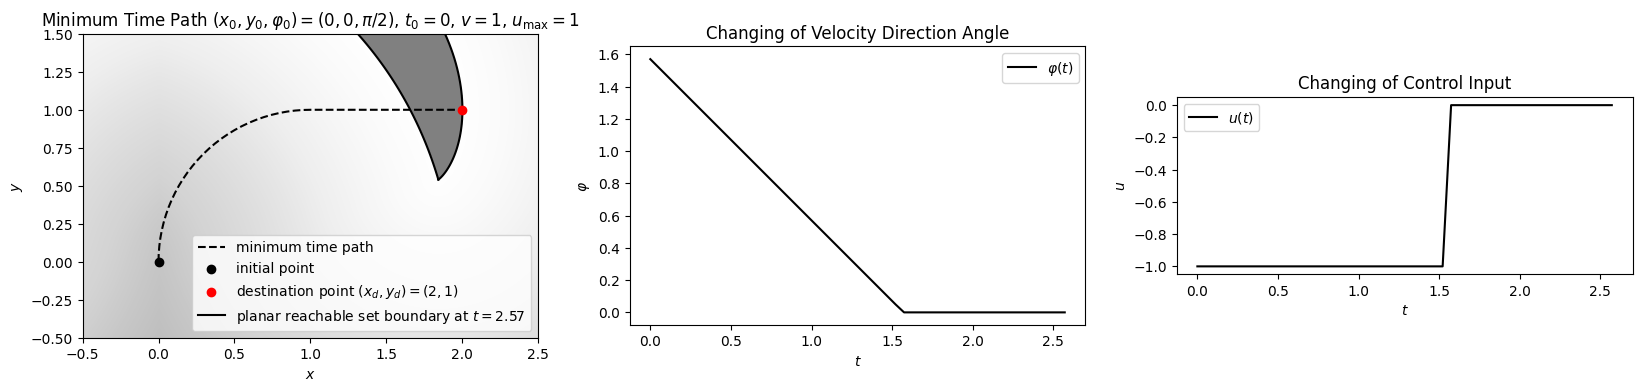

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mmcs.dubins.value import minimum_time_to_point
from mmcs.dubins.path import markov_path
from mmcs.dubins.control import minimum_time_control_to_point
from mmcs.dubins.reachability import planar_reachable_set, planar_reachable_set_boundary
from mmcs.dubins.reachability import distance_to_planar_reachable_set


x_dest, y_dest = 2, 1

t_dest = minimum_time_to_point(x_dest, y_dest)
t, x, y, ϕ = markov_path(x=x_dest, y=y_dest, n=50)
t, u = minimum_time_control_to_point(x=x_dest, y=y_dest, n=50)
x_grid = np.linspace(x.min() - 0.5, x.max() + 0.5, 500)
y_grid = np.linspace(y.min() - 0.5, y.max() + 0.5, 500)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
R = planar_reachable_set(t_dest, x_grid, y_grid)
B = planar_reachable_set_boundary(t_dest, n=100)
dist_to_R = distance_to_planar_reachable_set(t_dest, x_grid, y_grid)


fig, (xy, tϕ, tu) = plt.subplots(1, 3, figsize=(20, 20))

xy.plot(x, y, color='black', linestyle='dashed', label='minimum time path', zorder=1)
xy.scatter([x[0]], [y[0]], color='black', label=f'initial point', zorder=2)
xy.scatter([x_dest], [y_dest], color='red', zorder=2,
           label=rf'destination point $(x_{{d}}, y_{{d}}) = ({x_dest}, {y_dest})$')
xy.imshow(R, cmap="Greys", origin="lower", alpha=0.5, zorder=0,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.plot(*B[0], color='black', label=f'planar reachable set boundary at $t = {t_dest:.2f}$', zorder=0)
for Bx, By in B[1:]:
    xy.plot(Bx, By, color='black', zorder=0)
xy.imshow(dist_to_R, cmap="Greys", origin="lower", alpha=0.5, zorder=-1,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.set_aspect('equal')
xy.set_xlabel('$x$')
xy.set_xlim((x_grid.min(), x_grid.max()))
xy.set_ylabel('$y$')
xy.set_ylim((y_grid.min(), y_grid.max()))
xy.set_title(rf'Minimum Time Path $(x_0, y_0, \varphi_0) = ({0}, {0}, \pi/2)$, $t_0 = {0}$, $v = {1}$, $u_{{\max}} = 1$')
xy.legend()

tϕ.plot(t, ϕ, color='black', label=r'$\varphi(t)$')
tϕ.set_xlabel('$t$')
tϕ.set_ylabel(r'$\varphi$')
tϕ.set_aspect('equal')
tϕ.set_title('Changing of Velocity Direction Angle')
tϕ.legend()

tu.plot(t, u, color='black', label='$u(t)$')
tu.set_xlabel('$t$')
tu.set_ylabel('$u$')
tu.set_aspect('equal')
tu.set_title('Changing of Control Input')
tu.legend()
plt.show()

# Intercept a Moving Target

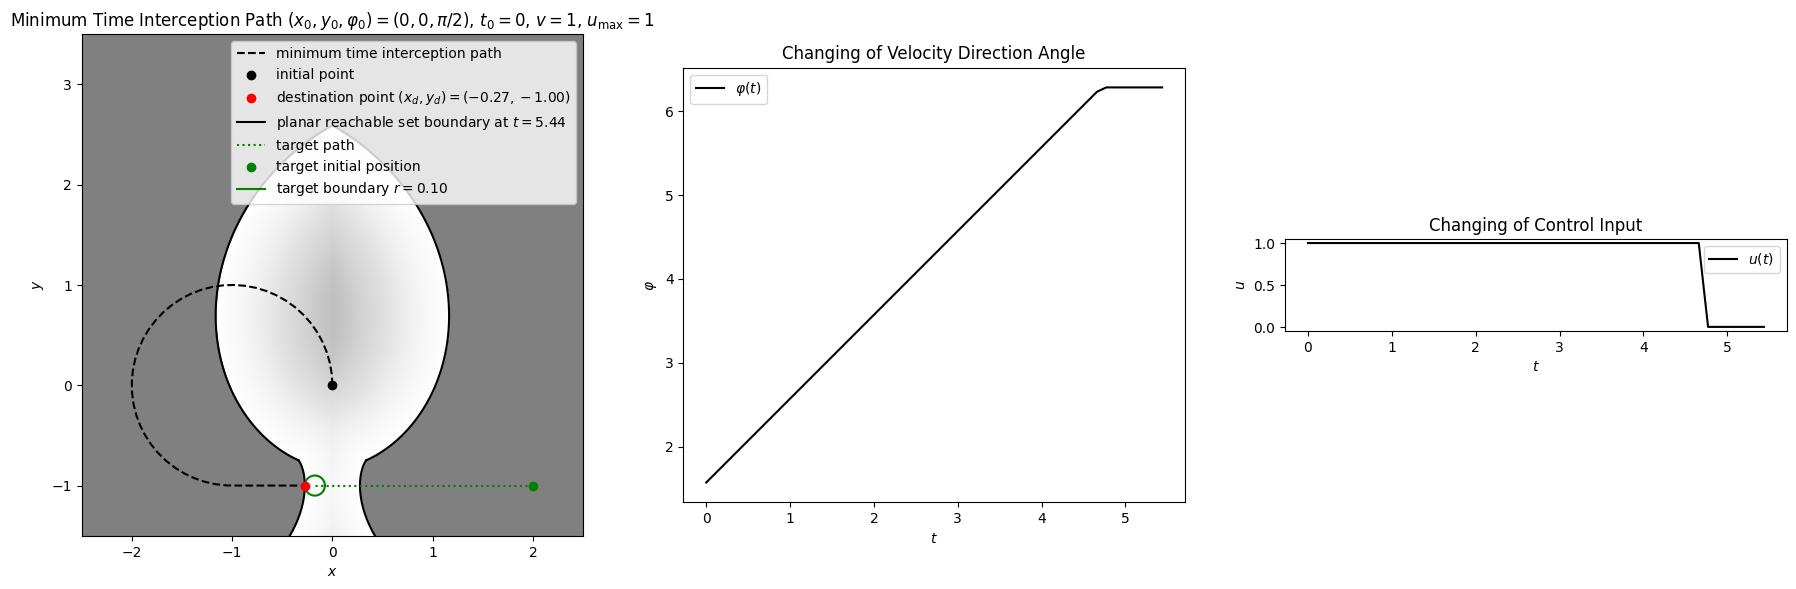

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mmcs.dubins.value import interception_minimum_time
from mmcs.dubins.path import admissible_path_to_point 
from mmcs.dubins.control import admissible_control_to_point 
from mmcs.dubins.reachability import planar_reachable_set, planar_reachable_set_boundary
from mmcs.dubins.reachability import distance_to_planar_reachable_set, nearest_point_to_planar_reachable_set


def xt(t):
    return 2 - vt*t

def yt(t):
    return -1 + 0*t

r = 0.1
vt = 0.4

t_dest = interception_minimum_time(xt=xt, yt=yt, r=r, v=vt)
x_dest, y_dest = nearest_point_to_planar_reachable_set(t=t_dest, x=xt(t_dest), y=yt(t_dest))
t, x, y, ϕ = admissible_path_to_point(t=t_dest, x=x_dest, y=y_dest, n=50)
t, u = admissible_control_to_point(t=t_dest, x=x_dest, y=y_dest, n=50)
x_grid = np.linspace(min(x.min(), xt(t).min()) - 0.5, max(x.max(), xt(t).max()) + 0.5, 500)
y_grid = np.linspace(min(y.min(), yt(t).min()) - 0.5, max(y.max(), yt(t).max()) + 2.5, 500)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
R = planar_reachable_set(t_dest, x_grid, y_grid)
B = planar_reachable_set_boundary(t_dest, n=100)
dist_to_R = distance_to_planar_reachable_set(t_dest, x_grid, y_grid)


fig, (xy, tϕ, tu) = plt.subplots(1, 3, figsize=(22, 22))

xy.plot(x, y, color='black', linestyle='dashed', label='minimum time interception path', zorder=1)
xy.scatter([x[0]], [y[0]], color='black', label=f'initial point', zorder=2)
xy.scatter([x_dest], [y_dest], color='red', zorder=2,
           label=rf'destination point $(x_{{d}}, y_{{d}}) = ({x_dest:.2f}, {y_dest:.2f})$')
xy.imshow(R, cmap="Greys", origin="lower", alpha=0.5, zorder=0,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.plot(*B[0], color='black', label=f'planar reachable set boundary at $t = {t_dest:.2f}$', zorder=0)
for Bx, By in B[1:]:
    xy.plot(Bx, By, color='black', zorder=0)
xy.imshow(dist_to_R, cmap="Greys", origin="lower", alpha=0.5, zorder=-1,
          extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),)
xy.plot(xt(t), yt(t), color='green', linestyle='dotted', label='target path', zorder=1)
xy.scatter([xt(0)], [yt(0)], color='green', label=f'target initial position', zorder=2)
α = np.linspace(0, 2*np.pi, 100)
xy.plot(xt(t_dest) + r*np.cos(α), yt(t_dest) + r*np.sin(α), color='green',
        label=f'target boundary $r = {r:.2f}$', zorder=1)
xy.set_aspect('equal')
xy.set_xlabel('$x$')
xy.set_xlim((x_grid.min(), x_grid.max()))
xy.set_ylabel('$y$')
xy.set_ylim((y_grid.min(), y_grid.max()))
xy.set_title(rf'Minimum Time Interception Path $(x_0, y_0, \varphi_0) = ({0}, {0}, \pi/2)$, '
             rf'$t_0 = {0}$, $v = {1}$, $u_{{\max}} = 1$')
xy.legend()

tϕ.plot(t, ϕ, color='black', label=r'$\varphi(t)$')
tϕ.set_xlabel('$t$')
tϕ.set_ylabel(r'$\varphi$')
tϕ.set_aspect('equal')
tϕ.set_title('Changing of Velocity Direction Angle')
tϕ.legend()

tu.plot(t, u, color='black', label='$u(t)$')
tu.set_xlabel('$t$')
tu.set_ylabel('$u$')
tu.set_aspect('equal')
tu.set_title('Changing of Control Input')
tu.legend()
plt.show()